In [1]:
import nltk
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,PorterStemmer
import re
import string
import matplotlib.pyplot as plt

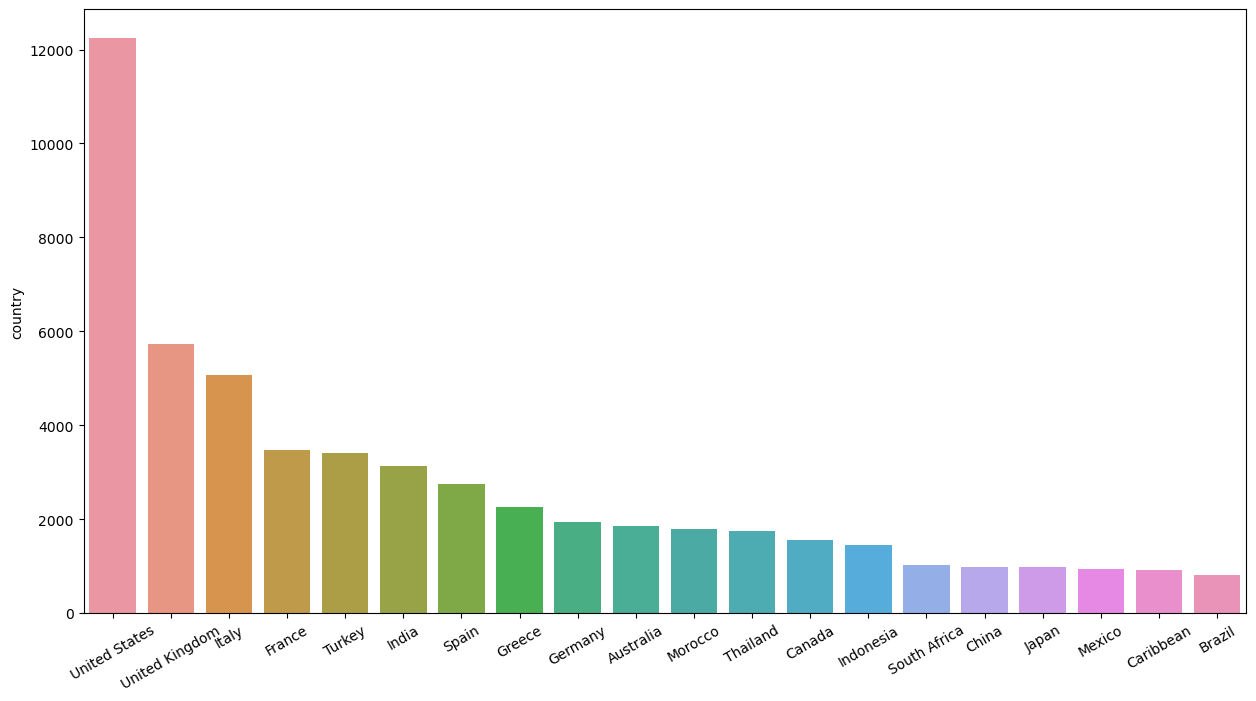

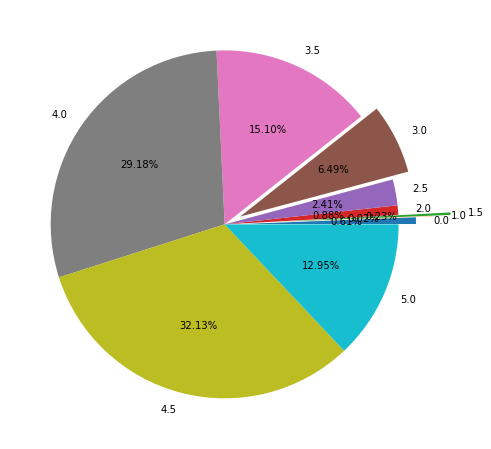


352 Guest House : 0.996580914239154
Collage Taksim : 0.9965405326880515
Bika Suites Istanbul Hotel : 0.9963602592605578
The Westist Hotel & Spa : 0.9963586656306582
Nova Plaza Taksim Square : 0.9961755679171833
Tolga Hotel : 0.9959952300301553
Anka Hotel : 0.9959925687711145
Hotel Gorres : 0.9959701257931025
Kotrba Privat : 0.9959601978535313
Hostel Sunseekers : 0.9958299831657513
Lancaster Eden Bay : 0.9958165669837024
Hotel Fatih Istanbul : 0.9958160478812628
Akgun Hotel : 0.9958136613056442
Milport Hotel Levent Istanbul : 0.9958136613056441
Empty Nest Bed and Breakfast : 0.9958128050533153
Prima Hotel : 0.9958126652387698
Seven Hills Hotel - Special Category : 0.9958126652387698
Metin Han : 0.9958096686826268
Grand Palace Hotel : 0.9958096686826268


''

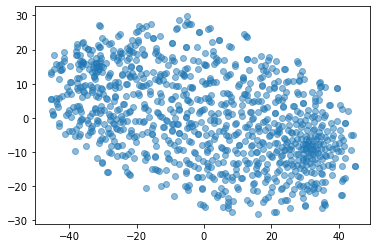

In [3]:
from ipynb.fs.full.Hotels_Recommender import get_recommendation
''

In [4]:
from ipynb.fs.full.Hotels_Recommender import extract_features

## Restaurants Recommender

In [5]:
restaurants = pd.read_csv('../datasets/restaurants_features_dataset.csv')

restaurants.head()


,name,features,cuisines,meals,special meals,official_description,rating,street,country,region,coords,image
0,Lokaal Spaanders,"Reservations,","French, European, Fusion, Street Food, Middle ...","Dinner,",NaN,Onze koks werken met seizoensgebonden groenten...,4.5,Zonneplein 4,The Netherlands,North Holland Province,"{'latitude': '52.41275', 'longitude': '4.89069'}",https://media-cdn.tripadvisor.com/media/photo-...
1,Mediamatic ETEN,"Reservations, Outdoor Seating, Seating, Serves...","European,","Dinner, Breakfast, Lunch, Drinks,","Vegetarian Friendly, Vegan Options,",Plantbased restaurant with a superb waterside ...,4.5,Dijksgracht 6,The Netherlands,North Holland Province,"{'latitude': '52.37637', 'longitude': '4.913192'}",https://media-cdn.tripadvisor.com/media/photo-...
2,Asian Eethuis,NaN,"Asian,",NaN,NaN,NaN,4.5,Admiraal de Ruijterweg 162hs,The Netherlands,North Holland Province,"{'latitude': '52.37436', 'longitude': '4.85875'}",NaN
3,Yumler - CLOSED,"Takeout, Outdoor Seating, Seating, Parking Ava...","International, Asian, Middle Eastern, Healthy,","Drinks, Lunch, Dinner,",NaN,NaN,0.0,Jan evertsestraat 747,The Netherlands,North Holland Province,"{'latitude': '52.369766', 'longitude': '4.8352...",https://media-cdn.tripadvisor.com/media/photo-...
4,Pasta Pasta,"Takeout, Reservations, Seating, Serves Alcohol...","Italian, Pizza, European,","Lunch, Dinner,","Vegetarian Friendly, Vegan Options,",cE5DX19WMlE,3.5,Warmoesstraat 49,The Netherlands,North Holland Province,"{'latitude': '52.375435', 'longitude': '4.8982...",https://media-cdn.tripadvisor.com/media/photo-...


In [6]:
restaurants.shape

(5797, 12)

In [7]:
import json
latitude = []
longitude = []
def append(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    latitude.append(x['latitude']) 
    longitude.append(x['longitude'])
restaurants['coords'].apply(append )
restaurants['latitude'] = latitude
restaurants['longitude'] = longitude
restaurants.head()

,name,features,cuisines,meals,special meals,official_description,rating,street,country,region,coords,image,latitude,longitude
0,Lokaal Spaanders,"Reservations,","French, European, Fusion, Street Food, Middle ...","Dinner,",NaN,Onze koks werken met seizoensgebonden groenten...,4.5,Zonneplein 4,The Netherlands,North Holland Province,"{'latitude': '52.41275', 'longitude': '4.89069'}",https://media-cdn.tripadvisor.com/media/photo-...,52.41275,4.89069
1,Mediamatic ETEN,"Reservations, Outdoor Seating, Seating, Serves...","European,","Dinner, Breakfast, Lunch, Drinks,","Vegetarian Friendly, Vegan Options,",Plantbased restaurant with a superb waterside ...,4.5,Dijksgracht 6,The Netherlands,North Holland Province,"{'latitude': '52.37637', 'longitude': '4.913192'}",https://media-cdn.tripadvisor.com/media/photo-...,52.37637,4.913192
2,Asian Eethuis,NaN,"Asian,",NaN,NaN,NaN,4.5,Admiraal de Ruijterweg 162hs,The Netherlands,North Holland Province,"{'latitude': '52.37436', 'longitude': '4.85875'}",NaN,52.37436,4.85875
3,Yumler - CLOSED,"Takeout, Outdoor Seating, Seating, Parking Ava...","International, Asian, Middle Eastern, Healthy,","Drinks, Lunch, Dinner,",NaN,NaN,0.0,Jan evertsestraat 747,The Netherlands,North Holland Province,"{'latitude': '52.369766', 'longitude': '4.8352...",https://media-cdn.tripadvisor.com/media/photo-...,52.369766,4.835214
4,Pasta Pasta,"Takeout, Reservations, Seating, Serves Alcohol...","Italian, Pizza, European,","Lunch, Dinner,","Vegetarian Friendly, Vegan Options,",cE5DX19WMlE,3.5,Warmoesstraat 49,The Netherlands,North Holland Province,"{'latitude': '52.375435', 'longitude': '4.8982...",https://media-cdn.tripadvisor.com/media/photo-...,52.375435,4.898271


In [8]:
restaurants.isna().sum()

name                       2
features                1453
cuisines                 667
meals                   1275
special meals           3008
official_description    3839
rating                     0
street                    34
country                    0
region                  1554
coords                     0
image                    869
latitude                   0
longitude                  0
dtype: int64

In [9]:
restaurants.shape

(5797, 14)

In [10]:
restaurants['features'] = restaurants['features'].fillna('Seating, Table Service,Reservations')
restaurants['special meals'] = restaurants['special meals'].fillna('')
restaurants['cuisines'] = restaurants['cuisines'].fillna('')
restaurants.head()


,name,features,cuisines,meals,special meals,official_description,rating,street,country,region,coords,image,latitude,longitude
0,Lokaal Spaanders,"Reservations,","French, European, Fusion, Street Food, Middle ...","Dinner,",,Onze koks werken met seizoensgebonden groenten...,4.5,Zonneplein 4,The Netherlands,North Holland Province,"{'latitude': '52.41275', 'longitude': '4.89069'}",https://media-cdn.tripadvisor.com/media/photo-...,52.41275,4.89069
1,Mediamatic ETEN,"Reservations, Outdoor Seating, Seating, Serves...","European,","Dinner, Breakfast, Lunch, Drinks,","Vegetarian Friendly, Vegan Options,",Plantbased restaurant with a superb waterside ...,4.5,Dijksgracht 6,The Netherlands,North Holland Province,"{'latitude': '52.37637', 'longitude': '4.913192'}",https://media-cdn.tripadvisor.com/media/photo-...,52.37637,4.913192
2,Asian Eethuis,"Seating, Table Service,Reservations","Asian,",NaN,,NaN,4.5,Admiraal de Ruijterweg 162hs,The Netherlands,North Holland Province,"{'latitude': '52.37436', 'longitude': '4.85875'}",NaN,52.37436,4.85875
3,Yumler - CLOSED,"Takeout, Outdoor Seating, Seating, Parking Ava...","International, Asian, Middle Eastern, Healthy,","Drinks, Lunch, Dinner,",,NaN,0.0,Jan evertsestraat 747,The Netherlands,North Holland Province,"{'latitude': '52.369766', 'longitude': '4.8352...",https://media-cdn.tripadvisor.com/media/photo-...,52.369766,4.835214
4,Pasta Pasta,"Takeout, Reservations, Seating, Serves Alcohol...","Italian, Pizza, European,","Lunch, Dinner,","Vegetarian Friendly, Vegan Options,",cE5DX19WMlE,3.5,Warmoesstraat 49,The Netherlands,North Holland Province,"{'latitude': '52.375435', 'longitude': '4.8982...",https://media-cdn.tripadvisor.com/media/photo-...,52.375435,4.898271


In [14]:
features = set()
restaurants['features'].apply(lambda x: [features.add(x) for x in str(x).split(',')])
restaurants['special meals'].apply(lambda x: [features.add(x) for x in str(x).split(',')])
restaurants['cuisines'].apply(lambda x: [features.add(x) for x in str(x).split(',')])
features.discard('')
features.discard(' ')
features = {x.strip() for x in features}
features

{'Accepts American Express',
 'Accepts Credit Cards',
 'Accepts Discover',
 'Accepts Mastercard',
 'Accepts Visa',
 'Afghani',
 'African',
 'Albanian',
 'Algerian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'BYOB',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Beach',
 'Beer restaurants',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Buffet',
 'Burmese',
 'Cafe',
 'Campania',
 'Canadian',
 'Caribbean',
 'Cash Only',
 'Catalan',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Central-Italian',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Costa Rican',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Deli',
 'Delivery',
 'Digital Payments',
 'Diner',
 'Dining bars',
 'Dog Friendly',
 'Drive Thru',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Emilian',
 'Ethiopian',
 'European',
 'Family style',
 'Fast Food',
 'Filipino',
 'Free Wifi',
 'Free off-street parking'

In [21]:
def extract_features(amenities,features) -> list:
    hotel_features = []
    col_names = pd.Index(features)
    for i,amenity in enumerate(amenities):
        if pd.notna(amenity):
            feats = amenity.split(',')
            row = np.zeros(len(features))
            for feat in feats:
                if feat != '' or feat != pd.isna:
                    ind = np.where(col_names == feat.strip())[0]
                    if len(ind) > 0:
                        index = ind[0] #index
                        row[index] = 1
            hotel_features.append(row)
    return hotel_features


In [22]:
amenities = restaurants['features'].apply(lambda x :x.strip()) + restaurants['special meals'] + ',' + restaurants['cuisines']
amenities = amenities.apply(lambda ament: ament.replace(",,",","))
res_features = extract_features(amenities,features)
amenities

0       Reservations,French, European, Fusion, Street ...
1       Reservations, Outdoor Seating, Seating, Serves...
2             Seating, Table Service,Reservations,Asian, 
3       Takeout, Outdoor Seating, Seating, Parking Ava...
4       Takeout, Reservations, Seating, Serves Alcohol...
                              ...                        
5792                 Seating, Table Service,Reservations,
5793    Delivery, Reservations, Private Dining, Seatin...
5794                                      Seating,Asian, 
5795    Reservations, Seating, Table Service, Serves A...
5796    Seating, Table Service,Reservations,Chinese, D...
Length: 5797, dtype: object

In [32]:
res_features_df = pd.DataFrame(res_features,columns=features)
res_features_df.head()

,Tibetan,Argentinean,Asian,Caucasian,Bar,Grill,Catalan,Digital Payments,Free off-street parking,Street Parking,...,Belgian,Czech,Soups,Egyptian,Scottish,Pub,Campania,Greek,Croatian,Gastropub
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


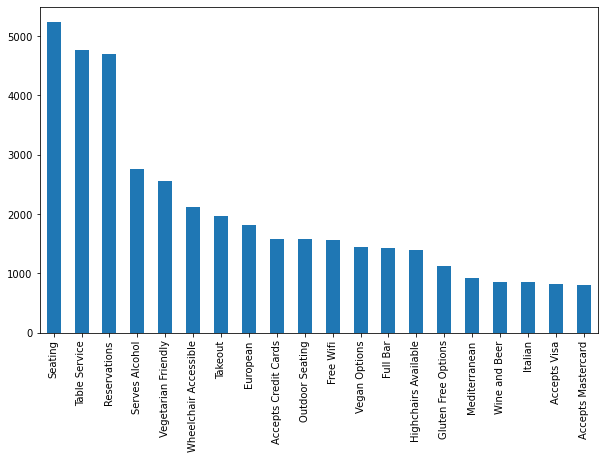

In [33]:
res_features_df.sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,6))

In [66]:
res_features_df = res_features_df.set_index(restaurants["name"])
res_features_df.sample(20)

,Tibetan,Argentinean,Asian,Caucasian,Bar,Grill,Catalan,Digital Payments,Free off-street parking,Street Parking,...,Belgian,Czech,Soups,Egyptian,Scottish,Pub,Campania,Greek,Croatian,Gastropub
name,,,,,,,,,,,,,,,,,,,,,
Viva Bodega,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New Cooking,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Meravigli 13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Cafe Salon - CLOSED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pappa Thai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hama Shin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zamzam Lobby Lounge,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alice Pizza - Via Flavia 91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wanhao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KNN Recommender

In [35]:
from sklearn.neighbors import NearestNeighbors

In [42]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine')

In [43]:
knn.fit(res_features_df)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [44]:
distances, indecies = knn.kneighbors(res_features_df)

In [98]:
indexes = np.random.permutation(len(res_features_df)//4)
for index in indexes :
    get_recommendation(res_features_df.iloc[index].name,indecies,distances,res_features_df,restaurants)
    print('------------')

Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
KFC - Edinburgh Craigleith : 0.9999999999999999
Burger King : 0.9999999999999999
Quick : 0.9999999999999999
Burger King : 0.9999999999999999
McDonald's : 0.9128709291752769
Burger King : 0.9128709291752769
Hardee's : 0.9128709291752769
McDonald's : 0.9128709291752769
Five Guys : 0.9128709291752769
------------
Bar Rassell : 0.9428090415820634
Bar Restaurante EL Bierzo : 0.9354143466934851
La Buena Vida : 0.8749999999999999
La Famiglia : 0.8749999999999999
Bar Restaurante Lepanto : 0.8660254037844387
La Torrada de Cristofol : 0.8660254037844387
Bar Restaurante Guixot : 0.8528028654224417
Tapitas : 0.8249579113843054
Del Favero : 0.8249579113843054
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0

Mutti Kreuzberg - CLOSED : 1.0
Cafe Peukert : 1.0
Achtern Diek : 1.0
Pier 44 : 1.0
Nikolaikeller : 1.0
------------
Efimeron : 0.6324555320336758
El Greco : 0.4999999999999999
Special : 0.4264014327112209
Souvlistas : 0.408248290463863
Olive et Balsamic : 0.408248290463863
Taverna Agais : 0.408248290463863
Relanti : 0.3922322702763681
Ta Koutalakia : 0.3922322702763681
Athina Bistrot : 0.3651483716701107
------------
Il Forno : 1.0
Ristorante Alghero : 1.0
Italiano Vero : 1.0
Cemelli - CLOSED : 1.0
Gianni Ristorante Budapest - CLOSED : 1.0
Trattoria Da Pindinello : 1.0
Trattoria boccio : 1.0
Pic-A-Deli : 1.0
Corners Pub : 1.0
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Oinomageirio Mparmpagiannis : 0.8432740427115678
Mezze : 0.8432740427115678
En Iordani : 0.8249579113843054
Antonis Cafe : 0.8040302522073697
Melin

LaPutika Cafe : 0.8749999999999999
Prvni Novomestsky Restauracni : 0.8749999999999999
Le Cristal : 0.8249579113843054
La Boheme Entre Amis : 0.8249579113843054
Czeczotka : 0.8249579113843054
Centralna Postaja : 0.8249579113843054
Dandelion : 0.8249579113843054
Whisky Bar 44 : 0.8249579113843054
Zeleneho Stromu : 0.801783725737273
------------
Le Cafe de la Cathedrale : 0.8749999999999999
Prvni Novomestsky Restauracni : 0.8749999999999999
Budapest Jazz Club : 0.8749999999999999
Cafe Daguerre : 0.8528028654224417
Centralna Postaja : 0.8249579113843054
Czeczotka : 0.8249579113843054
ZMAUC : 0.8249579113843054
Whisky Bar 44 : 0.8249579113843054
La Boheme Entre Amis : 0.8249579113843054
------------
Big Star Pub : 0.8164965809277261
Wash Bar : 0.8006407690254358
The Kilderkin : 0.7938566201357357
King's Wark : 0.7938566201357357
Sky Dome Bar : 0.7833494518006403
The Voodoo Rooms : 0.7715167498104595
The Stag : 0.7715167498104595
Old Chain Pier : 0.7559289460184545
Southpour : 0.748455199183

Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Vestauranten : 0.9999999999999998
Pizza Hut - Arkadia : 0.816496580927726
Bubbleology : 0.816496580927726
La Cave de Gaston Leroux : 0.816496580927726
Miam Miam : 0.7071067811865475
Zur Deutschen Sudsee Insel : 0.7071067811865475
Les Zievereirs : 0.7071067811865475
Chicheri : 0.7071067811865475
Crussh : 0.7071067811865475
------------
Cafe Vivaldi - Falkoner Alle : 0.6689936080056728
La Piada : 0.6674238124719147
Pizza BOYZ : 0.6446583712203042
Goody's Burger House : 0.6396021490668312
Mythos : 0.6396021490668312
Domino's Pizza - Dublin - Leopardstown : 0.6363636363636365
Special : 0.6363636363636365
Punkt G : 0.6363636363636365
BistroBio - CLOSED : 0.6227991553292184
------------
Picanha Plaza : 0.9036961141150636
Flesh Restaurant Canal Saint Martin : 0.7745966692414831
Restaurant Argentino Luna : 0.7660323462854264
Batucada : 0.7654655446197433
Fogo De Chao Brazilian SteakHouse : 

Tapas Brindisa Soho : 0.9074852129730301
Xiloka : 0.8823529411764707
Mediamanga : 0.8488746876271657
Cafe Kafka : 0.8488746876271657
Salamanca : 0.8426648406178137
La Nube : 0.8346223261119858
La Rollerie- Calle Mayor : 0.8273403039920306
Malvarosa : 0.823529411764706
------------
Pecnikar : 1.0
Bouchee : 1.0
Divoka Kacka : 1.0
De Klautjen : 1.0
Restaurant Syrtaki : 1.0
Tworzywo : 1.0
Caruzello by Dylan : 1.0
Ravintola Factory Tali : 1.0
Brasserie Beaulieu : 1.0
------------
Il Forno : 1.0
Ristorante Alghero : 1.0
Italiano Vero : 1.0
Cemelli - CLOSED : 1.0
Gianni Ristorante Budapest - CLOSED : 1.0
Trattoria Da Pindinello : 1.0
Trattoria boccio : 1.0
Pic-A-Deli : 1.0
Corners Pub : 1.0
------------
Golden Elephant Restaurant : 0.8999999999999999
New Emperor Chinese Restaurant : 0.8999999999999999
Shanghai : 0.8944271909999159
Fu Hao : 0.8944271909999159
Old Town Chinese : 0.8944271909999159
Chinatown Restaurant : 0.8944271909999159
Gam-Sing : 0.8944271909999159
Kitajski Vrt : 0.894427190

Tenshi : 0.8770580193070291
Kenji Sushi : 0.8461538461538465
Ayala Japon : 0.8461538461538465
------------
Le relais du triporteur : 0.6671243849949912
Souvlistas : 0.6405126152203486
3-Loze Restaurant : 0.6289709020331509
Banco Fast Food : 0.6201736729460423
Funky Fresh : 0.6139406135149205
BAO BAR 1070 : 0.592999453328881
Abi Falafel : 0.592999453328881
SLA Zuidas : 0.5883484054145521
Yumler - CLOSED : 0.5883484054145521
------------
Taverna PANOS : 0.9486832980505138
Nea Knosso : 0.9128709291752769
Mykonos Sendling : 0.8999999999999999
Sirtaki : 0.8999999999999999
Rembetiko : 0.8770580193070291
Athenes : 0.8581163303210333
Pasta e Basta : 0.8581163303210333
Trattoria Rathaus Piazza : 0.8581163303210333
Thessaloniki : 0.8451542547285165
------------
Fiston : 0.8488746876271657
M Georges Paris : 0.8346223261119858
Restaurant 2 La Rue : 0.823529411764706
Waknine : 0.823529411764706
Saldanha Mar : 0.814091578410694
L'Astragale : 0.8072073527955751
Am Tiirmschen : 0.8072073527955751
Aube

Wahaca Charlotte St : 0.7431605356175386
Wok to Walk : 0.7312724241271307
Urban Deli : 0.7080104323938432
Deli Bluem : 0.7058823529411765
Banco Fast Food : 0.7050239879106324
Trilogie : 0.7050239879106324
Lemonade : 0.6902684899626335
------------
Mediamatic ETEN : 0.8181818181818183
The Meets : 0.8058229640253802
Carpe Diem : 0.8040302522073697
Le chant des oliviers : 0.8040302522073697
Kadarka wine bar : 0.778498944161523
Urban City : 0.778498944161523
T Bar : 0.778498944161523
Ristorante Santissimo : 0.762770071396474
Dattera til Hagen : 0.762770071396474
------------
Eataly Ristorante : 0.9128709291752766
La Forchetta Pizzeria Ristorante : 0.9036961141150636
School Pizza Bar : 0.9036961141150636
Neptun : 0.9036961141150636
Salieri Pizzeria : 0.8970852271450606
Ristorante Vesuvio of Copenhagen : 0.8970852271450606
Don Leone Waffenplatz : 0.8970852271450606
La Romantica : 0.8970852271450606
Belmondo Ristorante : 0.8970852271450606
------------
SSAM Korean Food Bar : 0.872081599272380

Multu Kebab : 1.0
La Place du Village : 1.0
------------
McDonald's Keleti : 0.8660254037844388
The Pacific Fish Bar : 0.8660254037844388
Burger King : 0.8660254037844388
Whistle Stop : 0.8164965809277261
Subway : 0.75
McDonald's Amsterdam Muntplein : 0.75
Brunos Takeaway : 0.75
McDonald's : 0.75
Hediard : 0.75
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Weinzelt : 1.0
Restaurant Julius - CLOSED : 1.0
Preussen

The Sicilian Restaurant : 0.9128709291752769
Le Chateau : 0.8660254037844387
Ristorante Salentino : 0.8660254037844387
Caffe Rossini : 0.8660254037844387
La Famiglia : 0.8660254037844387
Hostaria del Monte Croce : 0.8333333333333336
------------
Tantarantan : 0.8249579113843054
Restaurante L'Ham : 0.8249579113843054
Restaurant la llesca : 0.816496580927726
Arcadio's : 0.816496580927726
Restaurante El Jardin : 0.816496580927726
Las 3 RRR : 0.816496580927726
Madrid : 0.7777777777777776
Catamaran : 0.7777777777777776
Restaurante El Cocinillas : 0.7698003589195012
------------
Il Forno : 1.0
Ristorante Alghero : 1.0
Italiano Vero : 1.0
Cemelli - CLOSED : 1.0
Gianni Ristorante Budapest - CLOSED : 1.0
Trattoria Da Pindinello : 1.0
Trattoria boccio : 1.0
Pic-A-Deli : 1.0
Corners Pub : 1.0
------------
Parador del Jamon : 0.8819171036881966
Lizarran : 0.8819171036881966
Casa Enriqueta : 0.8249579113843054
Restaurante L'Ham : 0.8249579113843054
Las Delicias del Jamon : 0.816496580927726
Casco V

Waiski : 0.4999999999999999
------------
Ravintola Maharaja : 1.0
Pizza 8 : 1.0
Pronto Pizza III : 1.0
volta cafe : 1.0
Amalfi pizzeria : 1.0
Subito : 1.0
Pizza Forte : 1.0
Roma : 1.0
Capris : 1.0
------------
Restaurant Schnitzelhuus : 0.7970811413304557
Gasthaus Albisguetli : 0.7715167498104595
Kochlistube : 0.7606388292556648
Deichgraf : 0.7590721152765897
Neubauschenke : 0.7252406676228422
Cafe LebensArt : 0.7252406676228422
Bistro am Fleet : 0.7252406676228422
Otto Wagner Schuetzenhaus : 0.7071067811865475
Salon 39 : 0.7071067811865475
------------
Melograno : 0.9036961141150636
Amarone : 0.9036961141150636
Papavero Restaurant : 0.8970852271450606
Salamanca : 0.8970852271450606
La Cucina : 0.8944271909999159
eLeBe Baixa : 0.8666666666666665
DOP : 0.8666666666666665
L'Osteria : 0.8666666666666665
Carluccios : 0.8666666666666665
------------
Subway : 0.816496580927726
Pret A Manger : 0.816496580927726
Empadaria do Chef : 0.816496580927726
McDonald's : 0.816496580927726
Gunters korva

El Patron : 0.7826237921249264
Yum...Me : 0.7826237921249264
Star Pizza : 0.7745966692414835
Papa John's : 0.7745966692414835
Pizzeria mexicana giovanni : 0.762770071396474
------------
Salaam Bombay : 0.9036961141150636
Puri Mas : 0.8970852271450606
Benares Indisk Restaurant : 0.8767140075192089
Wagamama : 0.8666666666666665
Serendib : 0.8666666666666665
Samrat : 0.8593378488473195
Kin Khao : 0.8593378488473195
Mendi : 0.8593378488473195
Opium : 0.8593378488473195
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Brasserie Blazer : 0.8461538461538465
Ravage Restaurant Copenhagen : 0.8461538461538465
Letcafe de Staalmeesters : 0.8461538461538465
Cafe Daguerre : 0.836242010007091
Oscar Bar Cafe : 0.836242010007091
Schweinske : 0.836242010007091
Centralna Postaja : 0.8320502943378436
Cafe Phenix : 0.8320502943378436
Weste

------------
Chinatown Restaurant : 0.9428090415820634
Fu Hao : 0.9428090415820634
Shanghai : 0.9428090415820634
Lian Pu Oriental Express Restaurant : 0.9428090415820634
Gam-Sing : 0.9428090415820634
Old Town Chinese : 0.9428090415820634
Kitajski Vrt : 0.9428090415820634
Le Bistrot Chinois : 0.8888888888888886
Chinese Restaurant Zhong Hua : 0.8888888888888886
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Estia C

Restaurante El Cocinillas : 0.8944271909999159
El Passatge del Murmuri : 0.8767140075192089
DOP : 0.8666666666666665
Caronte : 0.8666666666666665
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Casa Vicenta : 1.0
Taberna La Percha : 1.0
Vivid Tapas Bar : 1.0
La Encantada Reina de Cuba : 1.0
Bacalalo : 1.0
Rte. Tarrida : 1.0
Cerveceria Cucos : 1.0
La Catedral de la Tapa : 1.0
Bonissim : 1.0
------------
McDonald's : 0.9999999999999999
BURGER KING - Mexikoi : 0.9999999999999999
Hillbilly's Family Restaurants : 0.9999999999999999
McDonalds - Coolock : 0.9999999999999999
JAGGER Fast Food : 0.9999999999999999
Les Tontons Burgers : 0.9128709291752769
Subway : 0.8944271909999159
Chut Point : 0.8944271909999159
Basburek Ljubljana - CLOSED : 0.8944271909999159
------------
Du Dii : 0.7745966692414835
Sushi King : 0.77459666924

Fecske Presszo : 0.8666666666666665
DiVino Bazilika : 0.8198915917499229
Bratislava Flag Ship Restaurant : 0.814091578410694
Urban City : 0.7999999999999998
Sloik Restaurant : 0.7999999999999998
T Bar : 0.7999999999999998
Brasserie Barbes : 0.7877263614433762
De Bekeerde Suster : 0.7877263614433762
Porto di Pest : 0.7877263614433762
------------
Faraon : 0.9999999999999999
Al Tazaj : 0.8944271909999159
Mustafa's Gemuse Kebab : 0.8451542547285164
Bal Kofteci : 0.7999999999999999
Istanbul Kebab : 0.7999999999999999
Seherezada : 0.7905694150420948
Kebab Klubben : 0.7453559924999298
Kosem : 0.7453559924999298
Aspendos Bar And Grill : 0.7453559924999298
------------
Mr Dixon : 0.8249579113843054
MUC-Bar : 0.816496580927726
Boston Grill : 0.8040302522073697
Brickyard gastropub : 0.8017837257372733
Brasserie La Roseraie : 0.7777777777777776
Bar Bianco : 0.7777777777777776
Napper Tandy's : 0.7745966692414834
Mullingar House : 0.7698003589195012
Kavanaghs Temple Pub : 0.7698003589195012
-------

Axelborg Chinese Restaurant : 0.9128709291752769
Restaurante El Lirio : 0.9128709291752769
Casa Lee : 0.9128709291752769
------------
Restaurante Pepio : 0.7399400733959438
Vertigo Bar : 0.7399400733959438
The Burgundy : 0.7399400733959438
Cafe Kafka : 0.7276068751089991
Bar Marcel Santalo : 0.7276068751089991
Bar Base : 0.7276068751089988
Newsbar : 0.7233393492970543
Monaco Cafe : 0.7130240959073808
Morrison's : 0.7130240959073808
------------
Thai Harmonie : 0.8703882797784892
Ah Hua : 0.8581163303210333
Reaun Thai : 0.8581163303210333
Blue Moon Thai Cafe : 0.8581163303210333
Tamarin : 0.8581163303210333
Roza Slon : 0.8581163303210333
Maenaam Thai Restaurant : 0.8563488385776753
Sarla : 0.836242010007091
Jai : 0.836242010007091
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Mr Greek : 0.7905694150420948
akti : 0.72

L'atelier Ma Campagne : 0.7071067811865476
Insomnia : 0.7016464154456233
daTerra Restaurante Vegetariano : 0.6761234037828132
Fresh and tasty : 0.6708203932499369
Genusshelden : 0.6708203932499369
EXKi : 0.6708203932499369
Subway : 0.6454972243679029
Zuum : 0.6454972243679029
------------
India King - Indian Restaurant : 0.8134892168199603
GreenThai Restaurant : 0.7647058823529412
da Giacobbe : 0.7592566023652964
Restaurant Cibreiro : 0.7514691493021791
Namaste Indian Restaurant : 0.7426106572325057
New Exotic of India : 0.7399400733959438
Restaurant a Bar Klid Po Praci : 0.7399400733959438
Energia Do Brasil : 0.7333587976225692
Jerk. Jamaican Barbecue : 0.7276068751089991
------------
Koutska pivaren : 1.0
Sofiekaelderen Copenhagen : 0.9258200997725515
Jak's Bar : 0.9258200997725515
Zeleneho Stromu : 0.9258200997725515
Sounds Jazz Club : 0.9258200997725515
Systrarna Lundberg : 0.9258200997725515
Tin Pan Alley : 0.9258200997725515
L'Aperitivo : 0.9258200997725515
Cheers Pub : 0.9128709

Cafe Moda : 0.8888888888888886
Pickles : 0.8888888888888886
Nanis Of Wigmore : 0.8819171036881966
Le Pain Quotidien : 0.8432740427115678
Voila : 0.8432740427115678
EXKi : 0.8249579113843054
Panaria : 0.8249579113843054
Shakespeare and Co. Yas Mall : 0.816496580927726
Sweet Hell Eissalon : 0.816496580927726
------------
Abibayio : 0.7938841860374445
To Patriko : 0.7789808377045201
Restaurant Ilios : 0.7761140001162657
Ouzeri Lesvos : 0.7669649888473705
Naxos Taverna : 0.7585826061362606
Kriti : 0.7514691493021791
Cafe Manggha : 0.7399400733959438
Taverna Orea Penteli : 0.7312724241271307
Restaurante Dhaba : 0.7276068751089991
------------
Motor Cafe : 1.0
Bartini : 1.0
i-Cafe : 1.0
Ginger bar : 1.0
Harolds Cafe : 1.0
Sadaharu Aoki : 1.0
Tomtebo Art Cafe : 1.0
Maison Drap : 1.0
Karvana - CLOSED : 1.0
------------
Kosem : 0.8888888888888886
Seherezada : 0.8249579113843054
Aspendos Bar And Grill : 0.7777777777777776
Kapadokya : 0.7559289460184543
Mustafa's Gemuse Kebab : 0.7559289460184543

China Garden : 0.829515062006253
ELA Greek Cuisine : 0.8229511997978238
Cirkusz : 0.8229511997978238
Porta Nova : 0.8229511997978238
Auberge de Saviese : 0.8229511997978238
Wahaca Charlotte St : 0.8229511997978238
Salutorget : 0.8229511997978238
------------
La Tricoterie : 0.9354143466934851
Bistro Fohn : 0.8749999999999999
Soncek : 0.8749999999999999
Carpini restaurant : 0.8249579113843054
San Daniele : 0.8249579113843054
Brasserie Broadway : 0.801783725737273
Sphinx : 0.801783725737273
Parc Belair : 0.801783725737273
Brasserie Le Triton : 0.801783725737273
------------
Backwerk : 1.0
Caravan Kitchen : 1.0
De Koffiesalon : 1.0
Il Pane Di Anna : 1.0
Boulangerie Paul Kirchberg : 1.0
Olutravintola Solmu : 1.0
House of Donuts : 0.7071067811865475
Vinoteka DVEDECI : 0.7071067811865475
McDonald's : 0.7071067811865475
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab :

Cafe Pause : 1.0
Lazienkowska 3 : 1.0
Chartes : 1.0
El Eden de Laforja : 0.8944271909999159
Restaurant La Castiza : 0.8944271909999159
Lagoon Bar : 0.8660254037844388
Mangal 24 : 0.8660254037844388
Restaurant Pera : 0.8660254037844388
Carmel Delice : 0.8660254037844388
------------
Almalibre Acai House : 0.8819171036881969
Cafe Berlinka SNG : 0.8280786712108251
FACH Bistro : 0.8189230248533257
Cotidiano : 0.7970811413304557
Salon Wechsel Dich : 0.7606388292556648
La Cecilia de Allende : 0.7559289460184545
Cafe Mimosa : 0.7559289460184545
Savvas : 0.7412493166611013
Catch at St. Regis : 0.7357672073819591
------------
Cafe May : 0.8528028654224417
Flake : 0.8249579113843054
Ostfee : 0.8249579113843054
Mammouth : 0.801783725737273
Nanis Of Wigmore : 0.801783725737273
Back Werk : 0.801783725737273
La Lluna de Mel : 0.801783725737273
Rodilla : 0.801783725737273
Rusconi : 0.801783725737273
------------
Food For U : 0.75
Le Nid Savoureux : 0.6123724356957946
Shing Yang Restaurant : 0.6123724

Gam-Sing : 0.9999999999999999
Fu Hao : 0.9999999999999999
Kitajski Vrt : 0.9999999999999999
Lian Pu Oriental Express Restaurant : 0.9999999999999999
Chinatown Restaurant : 0.9999999999999999
Shanghai : 0.9999999999999999
E-wok : 0.9428090415820634
Restaurante Chines : 0.9428090415820634
Restaurace AndElsky Ujezd : 0.9428090415820634
------------
Los Mexikas : 0.816496580927726
Hombre : 0.816496580927726
El Luchador : 0.7745966692414835
Pepe e Sale : 0.7715167498104596
Senorita Mexicansk Restaurant : 0.7715167498104596
Zambrero : 0.7715167498104596
Happy India : 0.7715167498104596
Sabores de Goa : 0.7715167498104596
Bar Restaurante EL Bierzo : 0.7715167498104596
------------
Restaurant Konig : 1.0
Markattan : 0.9128709291752769
Kjellsons : 0.9128709291752769
Bistrot de la Presse : 0.9128709291752769
D'Gelle Klack : 0.9128709291752769
Cafe Buenos Aires na Fabrica : 0.8660254037844387
Museu dos Presuntos : 0.8333333333333336
Cafe Du Marche : 0.8333333333333336
Potato Factory : 0.833333333

Belpaese Pasta Al Momento : 0.9999999999999999
Enoteca Da Valentino : 0.9428090415820634
Trattoria Due : 0.9428090415820634
Ristorante Ponte Vecchio : 0.9428090415820634
Olio Pane Vino : 0.9428090415820634
Visconti : 0.9428090415820634
Gusto Trattoria : 0.9428090415820634
San Daniele : 0.9428090415820634
Chez Vincent : 0.9354143466934851
------------
Restaurant Jelica : 0.836242010007091
I Vigneri Osteria Hamburg : 0.8181818181818183
Laimers Wirtshaus : 0.8181818181818183
Herbeck - Neue Gastwirtschaft : 0.8181818181818183
Cafe Phenix : 0.8040302522073697
Kafi fur Dich : 0.8040302522073697
Die Waescherei : 0.7977240352174656
Jimmy's : 0.7977240352174656
Attic : 0.7833494518006403
------------
Thai Asien Take Away : 0.9999999999999999
Thai Twist : 0.9428090415820634
Ayudhya Restaurant : 0.9354143466934851
Blue Moon Thai Cafe : 0.8944271909999159
Ruen Thong : 0.8944271909999159
Tamarin : 0.8944271909999159
Ah Hua : 0.8944271909999159
Ho Lo : 0.8944271909999159
Reaun Thai : 0.8944271909999

Aux Amities Gourmandes chez Klevis : 0.6123724356957946
Fiston : 0.6123724356957946
------------
Magdalena Merlo Restaurant : 0.868599036215379
Yes Yes Yes : 0.8320502943378439
Hungarikum Bisztro : 0.8125
AleGloria : 0.8125
Purani Dilli Dubai : 0.7826237921249266
The Royal Mile Tavern : 0.7745966692414831
Juuri : 0.7660323462854264
Theatercafeen : 0.7637626158259736
Gostilna Sokol Ljubljana : 0.7627127698096903
------------
Amritsr Restaurant : 0.9534625892455926
Tandoori Indiai Etterem : 0.9534625892455926
Sarla : 0.9198662110078001
Takumi : 0.9090909090909093
Spicey Kitchen : 0.9045340337332909
Le Palais du Bengale : 0.9045340337332909
Surya : 0.9045340337332909
Kobal : 0.9045340337332909
Chandni : 0.9045340337332909
------------
Skordopisti : 1.0
1935 Mezedopoleio : 1.0
Aphrodite : 1.0
Concierge Athens Cafe : 1.0
Kourdistiri - CLOSED : 1.0
Olive Tree Restaurant : 1.0
Kapetan Mihalis : 1.0
Your sweet home : 1.0
Epi Tis Patision : 1.0
------------
Sesame : 0.8944271909999159
La Branch

La Torrada de Cristofol : 0.9128709291752769
Arcadio's : 0.9128709291752769
------------
Ristretto Restaurant and Cafe : 1.0
Ataula D'entenca : 0.8660254037844388
Baker Hansen Radhuset. : 0.8660254037844388
Menu Restaurant DPB : 0.8660254037844388
House of Sushi - Frogner - CLOSED : 0.8660254037844388
Caffe Rinaldi : 0.8660254037844388
Banh Mi Cousins : 0.8660254037844388
The Shelf : 0.8660254037844388
90'eren : 0.8660254037844388
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
BrewPub : 0.8743856497851878
Hyttefadet : 0.8743856497851878
Restaurant Karla : 0.8333333333333336
Ingierstrand Bad Restaurant : 0.8249579113843053
Bryggeri Helsinki : 0.8111071056538128
Peder Oxe : 0.8111071056538128
Kokoriko Bistro : 0.7911548052852397
SUD Restobar : 0.7905694150420951
Paulaner Braeuhaus : 0.7905694150420951
------------
Skor

100 Montaditos : 0.8006407690254358
Old Wild West Bourse - CLOSED : 0.7715167498104595
TribuBar : 0.7500000000000002
NEWSUSHI SUSHI PARADISE : 0.7484551991837491
Funky Fresh : 0.7302967433402215
O Campino : 0.7216878364870324
Ydroussa : 0.7216878364870324
Staromestianska Pivoteka : 0.7216878364870324
Bar Marcel Santalo : 0.7216878364870324
------------
Brasserie La Roseraie : 0.8819171036881966
Seven Days : 0.8571428571428569
Kleinhuis' Restaurant : 0.8571428571428569
Papa Albert : 0.8571428571428569
CHEZ THOMAS : 0.8571428571428569
Parc Belair : 0.8571428571428569
Le Bouchon Sully : 0.8571428571428569
Gondarem Baixa : 0.8571428571428569
Restaurante O Nortenho : 0.8571428571428569
------------
Cafe Punto : 0.9999999999999999
Eleven Gusto Etterem : 0.9999999999999999
Atlantisz Etterem : 0.9999999999999999
Rozsalugas Etterem : 0.9999999999999999
Rokolya Restaurant : 0.9999999999999999
Gyergyo Arpi's Restaurant : 0.9999999999999999
erombitas gorozo bierstube : 0.9999999999999999
Trattoria

Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Restaurant a Bar Klid Po Praci : 0.7877263614433762
Francesco Cafe : 0.7590721152765897
Restaurant Cibreiro : 0.7333333333333332
La Mandria : 0.7333333333333332
Pub Pod Skalco : 0.7333333333333332
PIRATA Sushi : 0.7108186533109108
Satori Stage : 0.7108186533109108
Ydroussa : 0.7100469468046928
Restaurant Triangolo : 0.7100469468046928
------------
Xiloka : 0.8902638145194516
Salamanca : 0.8583950752789523
L'Oste e La Civetta : 0.8421052631578942
Ecco Vino : 0.8421052631578942
Malvarosa : 0.8346223261119858
Betlem Miscel.lania Gastronomica : 0.8346223261119858
La Rollerie- Calle May

El Luchador : 0.7171371656006361
Mojito : 0.7171371656006361
Los Bandidos : 0.7142857142857141
Don Luca : 0.6837634587578276
------------
Restaurant Schonnemann : 0.7559289460184544
La Cuina del Mon Diwali : 0.7071067811865475
1055 : 0.7071067811865475
Malta Cafeteria Og Selskabslokaler : 0.6708203932499369
Taket : 0.6708203932499369
Ukko-Munkki : 0.6708203932499369
Ravintola Basti's : 0.6708203932499369
Tivoli Hallen : 0.6666666666666666
Restaurant Sankt Annae : 0.6666666666666666
------------
Tate Modern Restaurant Level 9 : 0.9230769230769235
Southpour : 0.8498365855987974
Maison Bleue at Home : 0.8461538461538465
Blonde Restaurant : 0.8461538461538465
Vila Gale Hotels : 0.836242010007091
King's Wark : 0.8320502943378439
The Booking Office : 0.8320502943378439
The McKirdy's Steakhouse : 0.8153742483272114
Wildwood : 0.8153742483272114
------------
ELA Greek Cuisine : 0.8574929257125445
The Cock : 0.8488746876271657
Hungarikum Bisztro : 0.8488746876271657
The Hairy Lemon Cafe Bar : 0

Tiffany Restaurant : 0.8215838362577492
Brasserie Meeus : 0.8215838362577492
Auberge Du Moulin : 0.8198915917499229
Botak Cafe : 0.8164965809277261
Les 3 Brasseurs : 0.7938566201357357
au bon gibier : 0.7833494518006403
Brasserie du Gourmet : 0.7833494518006403
Skol Restaurant : 0.7701540462154055
------------
Carluccios : 0.8593378488473195
Mielzynski : 0.836242010007091
Les Antiquaires : 0.8153742483272114
The Britannia : 0.8153742483272114
Marco Pierre White Steakhouse and Grill : 0.8153742483272114
Cote Brasserie : 0.8153742483272114
Collage : 0.8072073527955751
Bella Bambina : 0.7877263614433762
Vela Latina : 0.7877263614433762
------------
Starry Kitchen : 0.9354143466934851
Asian Fantasy : 0.8749999999999999
Restaurante El Lirio : 0.8660254037844387
Novo Seculo : 0.8660254037844387
Shing Yang Restaurant : 0.8660254037844387
Le Nid Savoureux : 0.8660254037844387
Ken Yau : 0.8660254037844387
Red face : 0.8528028654224417
Panda Express Geneva : 0.8528028654224417
------------
Leesh

In [74]:
from sklearn.decomposition import TruncatedSVD

In [79]:
svd = TruncatedSVD(n_components=2)
svd.fit(indecies)

TruncatedSVD()

In [80]:
X = svd.transform(indecies)

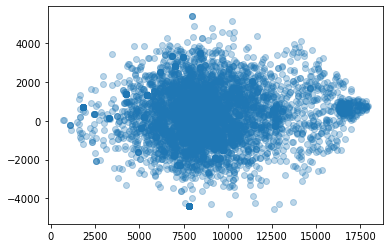

In [81]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)